<a href="https://colab.research.google.com/github/logansdmi/CurveFitting/blob/main/CurveFitting.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#Curve Fitting#
The purpose of this exercise is to implement a batch stochastic gradient descent algorithm to make a input polynomial function fit a desired polynomial.






First a function to make the initial polynomial of the form:
$$y(x)=∑_iθ_ix_i$$
with noise added, I chose a normal distribution for the noise function

In [1]:
#imports relevant libraries

import numpy as np 
import matplotlib.pyplot as plt 


def polyModelWithNoise(x,theta,sigma):
  ''' inputs : x - array of x values, theta - an array of parameters of the polynomial, sigma - standard deviation of noise applied
  outputs:y(x) the sum of the parameter times the x values which are raised to the order of polynomial with noise added ''' 
  terms = np.array([])
  y = np.array([])
  for j in range(len(x)):
    noise = np.random.normal(0, sigma)
    terms = 0 
    for i in range(len(theta)):
      terms = np.append(terms,theta[i]*(x[j]**(i+1)))
    y = np.append(y,np.sum(terms)+ noise)
  return y


Plotting the polynomial with theta values [0,1] and a sigma of 0.5:

Text(0.5, 1.0, 'polynomial with theta as [0,1] and noise sigma as 0.5')

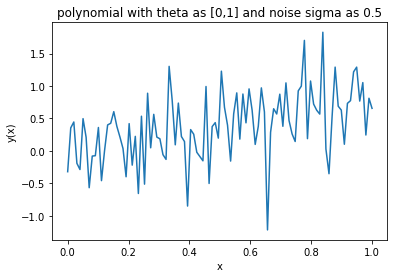

In [2]:
# setting initial values
theta = np.array([0,1])
x=np.linspace(0,1,100)


# plots graph of polynomial
plt.plot(x,polyModelWithNoise(x,theta,0.5))
plt.xlabel("x")
plt.ylabel("y(x)")
plt.title("polynomial with theta as [0,1] and noise sigma as 0.5")

Defining the function that calculates the gradient of the polynomial with respect to each theta value

In [3]:
def polyGradient(x,theta):
  ''' inputs: x - array of x values, theta - array of theta values
  outputs: array of the gradient of the polynomial with respect to each theta input'''
  
  terms = np.array([])
  y = np.array([])
  for l in range(len(theta)):
    thetaInter = theta[l]
    theta[l] = 1 # changes the theta value that the function is being differentiated by to one
    for j in range(len(x)):
      terms = 0
      for i in range(len(theta)):
        terms = np.append(terms,theta[i]*(x[j]**(i+1)))
      y = np.append(y,np.sum(terms))
    theta[l] = thetaInter # changes the theta values back to the originals
  
  return y.reshape(len(theta),len(x))




Defining functions to create the random numbers, calculate the model functions and to carry out a batch stochastic gradient descent of the form:
$$ \theta_{i+1} = \theta_{i} - \eta_i  \left< \Delta f\right> \frac{\partial f}{\partial \theta} $$
that is looped over to get updated values of theta. 
Where $\theta_{i+1}$ is the next values of theta being calculated, $\theta_{i}$ is the last theta values, $\eta_i$ is the learning rate, $\left< \Delta f\right>$ is the average difference between the model function and the function being fitted over a batch size $n$ and $\frac{\partial f}{\partial \theta} $ is the gradient of the function being fitted with respect to the theta values.

In [4]:
def randx(numx):
  '''inputs: numx- number of randon x values wanted
  outputs: random values of x between 0 and 1 uniformly distributed'''
  return np.random.random_sample(numx)

def modelPoly(x,theta):
  '''inputs: x - array of x values, theta - parameters of polynomial 
  ouptuts: outputs:y(x) the sum of the parameter times the x values which are raised to the order of polynomial with no noise'''
  return polyModelWithNoise(x,theta,0)

def gradDescent(steps,eta,numx,theta,sigma,thetaModel):
  ''' inputs : steps - the number of steps used in the gradient descent, eta - learning rate, numx - number of x values sampled, 
  theta - starting theta values, sigma - std deviation of noise in polynomial function, thetaModel - model theta values
  output : theta values obtained from gradient descent, array of the average deviations squared'''
  deviationArray = np.array([])
  for i in range(steps):
    x=randx(numx)

    deviation=polyModelWithNoise(x,theta,sigma)-modelPoly(x,thetaModel)
    deviationArray = np.append(deviationArray, np.average(deviation**2))

    theta=theta - eta*np.average(deviation[None,:]*polyGradient(x,theta),axis = 1)
   
  
  return theta, deviationArray


Defining a function so that the results of the gradient descent can be plotted, $\left< (\Delta f)^2\right>$ is plotted against the step in the gradient descent loop to see how the difference betweent the functions change as the loop progresses.

In [ ]:
def graphs(x,theta,newTheta,thetaModel,sigma,steps):
  # plotting the results of the gradient descent
  plt.figure(figsize=(10,5))
  plt.plot(x,polyModelWithNoise(x,theta,sigma), label='Original polynomial with noise function')
  plt.plot(x,modelPoly(x,thetaModel), label = 'function being fitted to with theta values: {}'.format(str(thetaModel)))
  plt.plot(x,polyModelWithNoise(x,newTheta,sigma), label ='function with new theta values and noise')
  
  plt.plot(x,modelPoly(x,newTheta), label = 'function with new theta, no noise')
  plt.legend()
  plt.xlabel("x")
  plt.ylabel("y(x)")

  #Plot of the deviations squared
  plt.figure()
  plt.plot(np.arange(steps) ,gradDescent(steps,eta,numx,theta,sigma,thetaModel)[1])
  plt.ylabel("$deviation^2$")
  plt.xlabel("step number")

Fitting the polynomial $\theta = [0,1], \sigma_{noise} = 0.5$ to the polynomial $\theta = [-1,0.5], \sigma_{noise} = 0$ and plotting it. Doing 100 steps, a batch size 10 and with a learning rate of 0.5.

the final theta values calculated:  [-0.87429957  0.52830206]


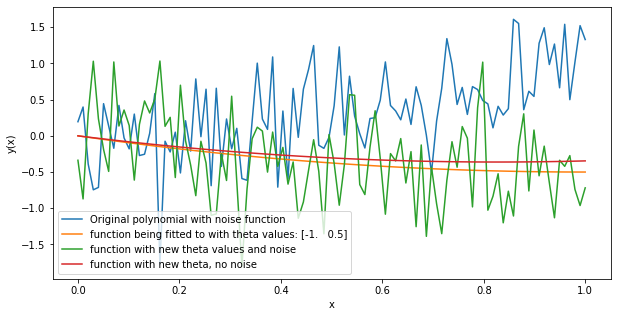

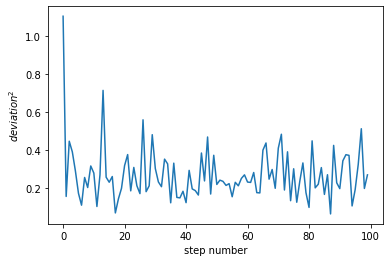

In [15]:
# setting variables needed for the gradient descent function
steps = 100
eta = 0.5 
numx = 10
theta = np.array([0,1])
sigma = 0.5
thetaModel = np.array([-1,0.5])

# using function to get new theta values
newTheta = gradDescent(steps,eta,numx,theta,sigma,thetaModel)[0]
print('the final theta values calculated: ',newTheta)

# setting up x values to plot
x=np.linspace(0,1,100)

#plots the graphs
graphs(x,theta,newTheta,thetaModel,sigma,steps)


Fitting the polynomial $\theta = [0,1,2,2], \sigma_{noise} = 0.5$ to the polynomial $\theta = [-1], \sigma_{noise} = 0$ and plotting it. Doing 130 steps, a batch size 10 and with a learning rate of 0.01. The values of the number of steps and learning rate came from experimenting with different values and seeing what fit best.

the final theta values calculated:  [-1.67303595 -0.88012987  0.2702009   0.22510484]


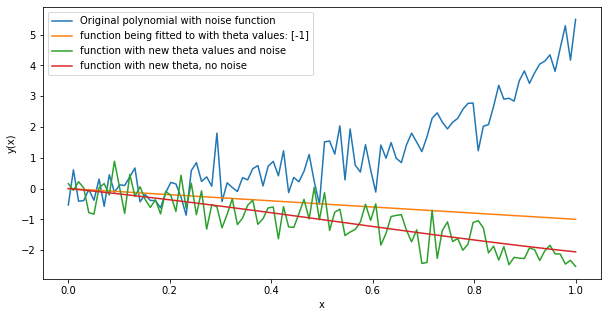

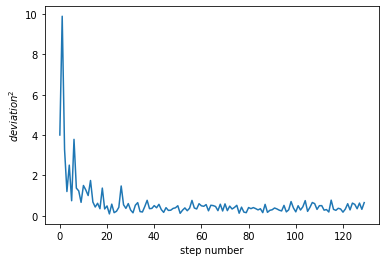

In [38]:
# setting variables needed for the gradient descent function
steps = 130
eta = 0.04
theta = np.array([0,1,2,2])

thetaModel = np.array([-1])

# using function to get new theta values
newTheta = gradDescent(steps,eta,numx,theta,sigma,thetaModel)[0]
print('the final theta values calculated: ',newTheta)

x=np.linspace(0,1,100)

#plots the graphs
graphs(x,theta,newTheta,thetaModel,sigma,steps)

Fitting the polynomial $\theta = [0,1,2,2], \sigma_{noise} = 0.5$ to the polynomial $\theta = [-1,2,2], \sigma_{noise} = 0$ and plotting it. Doing 100 steps, a batch size 10 and with a learning rate of 0.09. The values of the number of steps and learning rate came from experimenting with different values and seeing what fit best.

the final theta values calculated:  [-0.45526036  0.48314753  1.55597668  1.56763543]


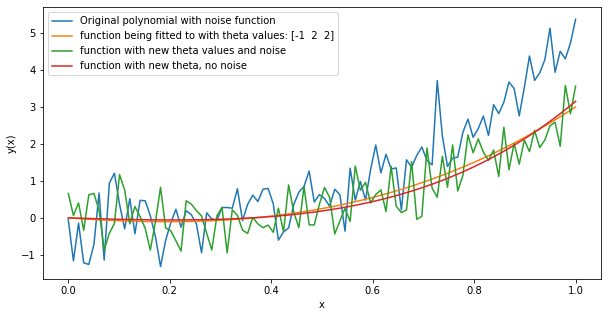

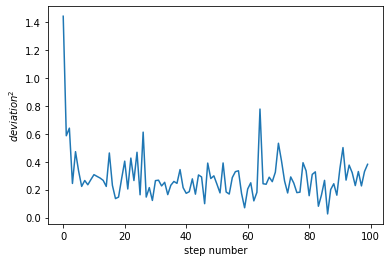

In [65]:
# setting variables needed for the gradient descent function
steps = 100
eta = 0.09

thetaModel = np.array([-1,2,2])

# using function to get new theta values
newTheta = gradDescent(steps,eta,numx,theta,sigma,thetaModel)[0]
print('the final theta values calculated: ',newTheta)

    
x=np.linspace(0,1,100)

#plots the graphs
graphs(x,theta,newTheta,thetaModel,sigma,steps)

Fitting the polynomial $\theta = [0,1,2,2], \sigma_{noise} = 0.5$ to the polynomial $\theta = [-1,-2,1,2,3,1,-2], \sigma_{noise} = 0$ and plotting it. Doing 150 steps, a batch size 10 and with a learning rate of 0.14. The values of the number of steps and learning rate came from experimenting with different values and seeing what fit best.

the final theta values calculated:  [-2.16475569  0.30667243  1.89390226  1.79468586]


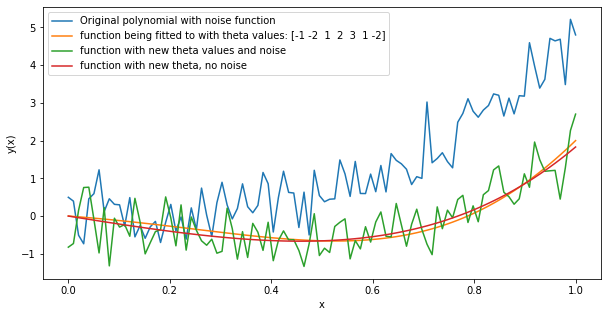

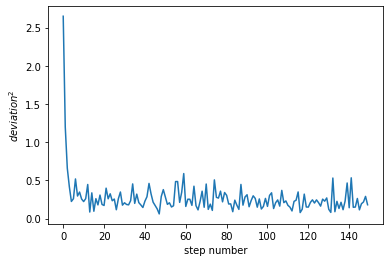

In [85]:
# setting variables needed for the gradient descent function
steps = 150
eta = 0.14

thetaModel = np.array([-1,-2,1,2,3,1,-2])

# using function to get new theta values
newTheta = gradDescent(steps,eta,numx,theta,sigma,thetaModel)[0]
print('the final theta values calculated: ',newTheta)

    
x=np.linspace(0,1,100)


#plots the graphs
graphs(x,theta,newTheta,thetaModel,sigma,steps)

Fitting the polynomial $\theta = [0,1,2,2], \sigma_{noise} = 0.5$ to the polynomial $\theta = [-1,2,2], \sigma_{noise} = 0$ and plotting it. Doing 100 steps, a batch size 10 and with a learning rate of 0.09. This time the data was plotted outside of the range of values of x that were used to train the function.

the final theta values calculated:  [-0.50157537  0.49608835  1.57574971  1.57642882]


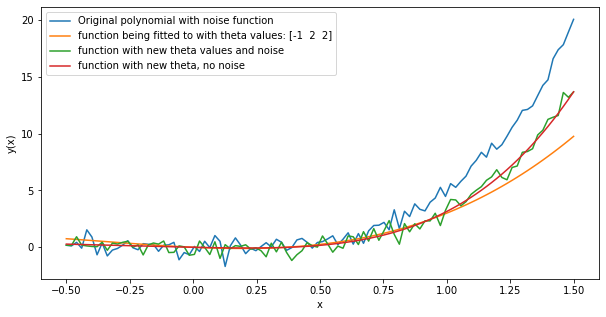

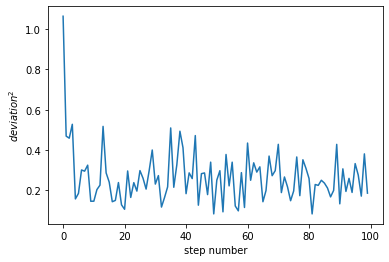

In [86]:
# setting variables needed for the gradient descent function
steps = 100
eta = 0.09

thetaModel = np.array([-1,2,2])

# using function to get new theta values
newTheta = gradDescent(steps,eta,numx,theta,sigma,thetaModel)[0]
print('the final theta values calculated: ',newTheta)

    
x=np.linspace(-0.5,1.5,100)

#plots the graphs
graphs(x,theta,newTheta,thetaModel,sigma,steps)

Within the values of x that it was trained with it fits quite well but outside of this range it diverges. The other best fits were plotted within the values of x that they were trained with so also fit well within the range.